In [2]:
import csv
import random

ingredients = ['pepper', 'ginger', 'chili']
combinations = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            combinations.append({'pepper': bool(i), 'ginger': bool(j), 'chili': bool(k)})

def customer_likes(sample):
    return sum(val is True for val in sample.values()) >= 2

def introduce_missing_and_outliers(sample):
    for key in sample:
        r = random.random()
        if r < 0.1:
            sample[key] = None  # 10% chance of missing
        elif r < 0.15:
            sample[key] = "maybe"  # 5% chance of outlier string
        elif r < 0.2:
            sample[key] = 2  # 5% chance of outlier number
    return sample

with open('spice_preferences_messy.csv', 'w', newline='') as csvfile:
    fieldnames = ['pepper', 'ginger', 'chili', 'liked']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for _ in range(100):
        sample = random.choice(combinations).copy()
        sample = introduce_missing_and_outliers(sample)
        sample['liked'] = customer_likes(sample)
        writer.writerow(sample)


<ipython-input-7-13d93deaa304>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-7-13d93deaa304>:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(mode_val, inplace=True)


              precision    recall  f1-score   support

   Not Liked       0.81      1.00      0.90        13
       Liked       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20



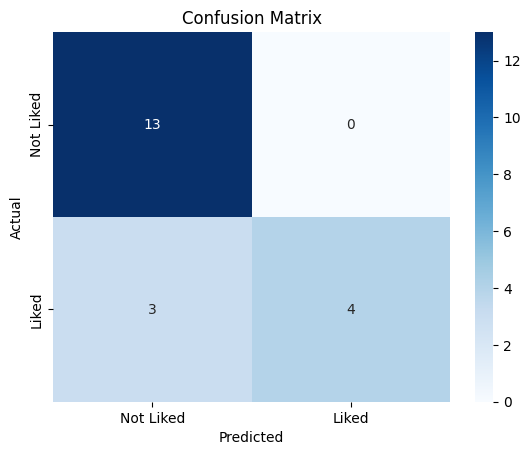

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/spice_preferences_messy.csv')

# Convert valid booleans; treat invalids as missing (None)
for col in ['pepper', 'ginger', 'chili']:
    df[col] = df[col].map(lambda x: True if x is True or x == 'True' else False if x is False or x == 'False' else None)

# Fill missing values using the mode (most common value)
for col in ['pepper', 'ginger', 'chili']:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Prepare features and target
X = df[['pepper', 'ginger', 'chili']].astype(bool)
y = df['liked'].astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ID3-like classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, target_names=['Not Liked', 'Liked']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "ID3 (DecisionTree)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Not Liked', 'Liked']))



ID3 (DecisionTree) Performance:
Accuracy: 0.85
              precision    recall  f1-score   support

   Not Liked       0.81      1.00      0.90        13
       Liked       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20


Random Forest Performance:
Accuracy: 0.85
              precision    recall  f1-score   support

   Not Liked       0.81      1.00      0.90        13
       Liked       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20


Logistic Regression Performance:
Accuracy: 0.75
              precision    recall  f1-score   support

   Not Liked       0.72      1.00      0.84        13
       Liked       1.00      0.29      0.44         7

    accuracy                           0.7

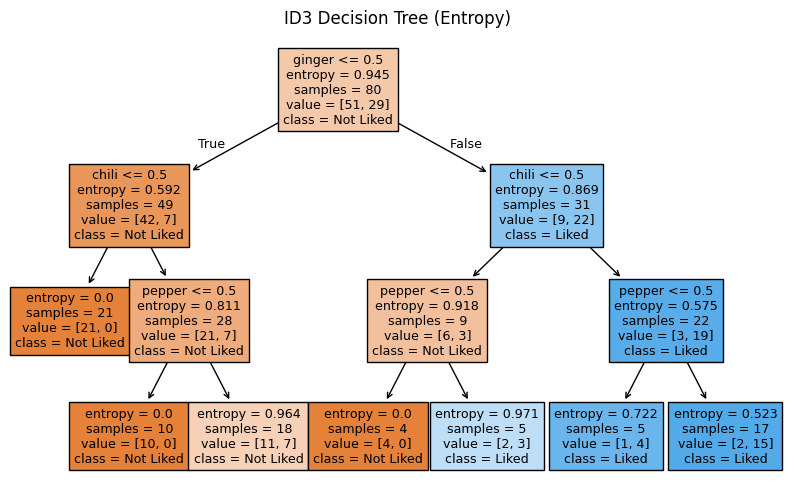

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['pepper', 'ginger', 'chili'], class_names=['Not Liked', 'Liked'], filled=True)
plt.title("ID3 Decision Tree (Entropy)")
plt.show()
